# Sniper Farms

The goal of this document is to debug the newly created sniper class and check that it's functioning correctly.

In [1]:
import b2sim.engine as b2
import b2sim.analysis as dd

## Case 1: Simulating a Supply Drop

We build a simulation in which the player already has a supply drop on hand and simply track what the supply drop does from round 20 start to round 24 start.

,Time,Type,Message
0,448.2,Eco,Change eco to Zero
1,457.0,Round,Round 21 start
2,473.5,Round,Round 22 start
3,503.8,Round,Round 23 start
4,516.3,Round,Round 24 start


,Revenue,Expenses,Profit,Start Time,End Time
Sniper Index,,,,,
0,4000,0,4000,448.0,516.0


The current cash and eco are (13600,800)


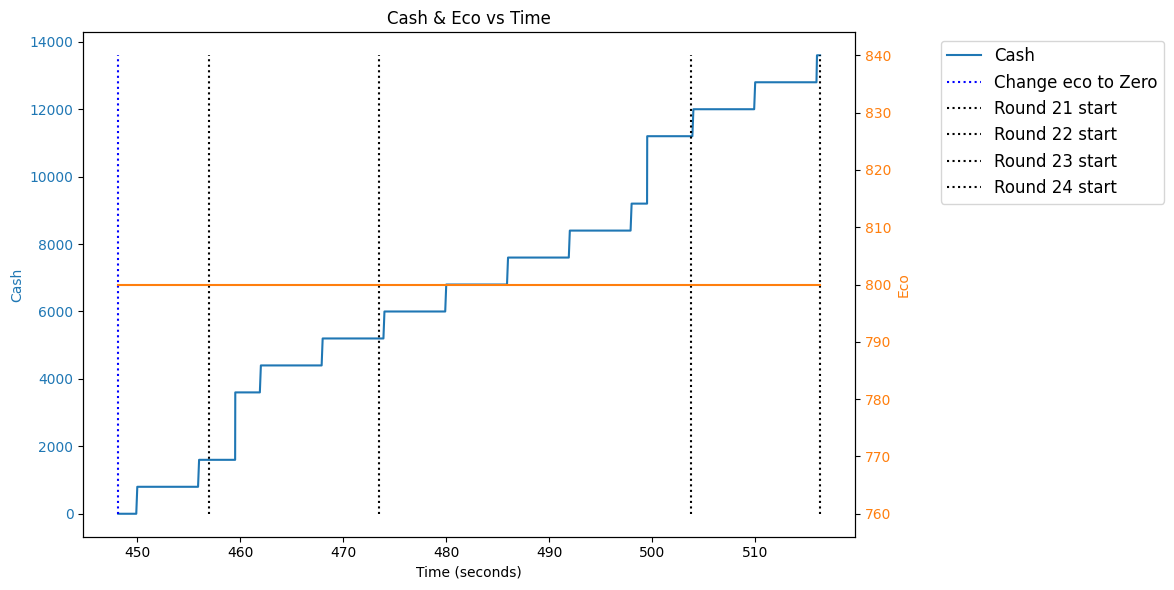

In [2]:
rounds = b2.Rounds(0.1)
snipers = [b2.Sniper(purchase_time=rounds.getTimeFromRound(19.9))]

initial_state_game = {
    'Cash': 0,
    'Eco': 800,
    'Eco Send': b2.ecoSend(send_name = 'Zero'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Game Round': 20,
    'Supply Drops': snipers
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 24)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'sniper_debugging_1')

## Case 2: Purchasing a Supply Drop

We now build a simulation in which the player, saves up for and purchases a supply drop. The player starts saving at Round 19, when they have 2k eco.

,Time,Type,Message
0,411.8,Eco,Change eco to Zero
1,438.0,Buy,Buy supply drop
2,448.2,Round,Round 20 start
3,457.0,Round,Round 21 start
4,473.5,Round,Round 22 start
5,503.8,Round,Round 23 start
6,516.3,Round,Round 24 start


,Revenue,Expenses,Profit,Start Time,End Time
Sniper Index,,,,,
0,4000,9550,-5550,438.0,516.0


The current cash and eco are (30450,2000)


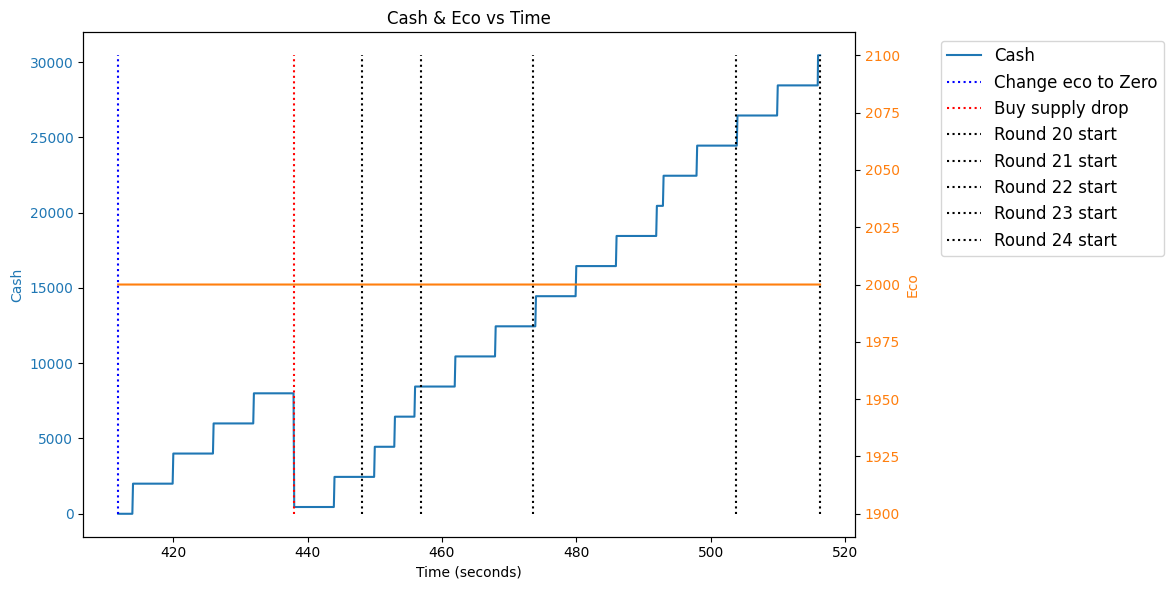

In [3]:
rounds = b2.Rounds(0.1)

buy_queue = [
    [b2.buySupplyDrop()]
]

initial_state_game = {
    'Cash': 0,
    'Eco': 2000,
    'Eco Send': b2.ecoSend(send_name = 'Zero'),
    'Rounds': rounds, #Determines the lengths of the rounds in the game state
    'Game Round': 19,
    'Buy Queue': buy_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 24)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'sniper_debugging_2')


# Case 3: The Motherload Case

We create a simulation in which the player starts Round 20 with 2000 eco. While pink eco'ing, the player buys a supply drop. Once they purchase the supply drop, they upgrade it to an elite sniper. After they upgrade it to an elite sniper, they start repeatedly buying supply drops until 